<a href="https://colab.research.google.com/github/Abijith-B/Git-hub-Data/blob/main/Unsupervised_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

#Loading dataset

In [ ]:
filepath = '/content/drive/MyDrive/DSA ICT/data/adult_dataset.csv'
adult_data = pd.read_csv(filepath)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [ ]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


In [ ]:
adult_data.shape

(48842, 15)

In [ ]:
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,46400.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,46400.000000
mean,38.679116,1.896641e+05,10.078089,1079.067626,87.502314,40.448599
std,13.952954,1.056040e+05,2.570973,7452.019058,403.004552,12.646992
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


In [19]:
adult_data.replace('?', np.nan, inplace=True)

In [20]:
adult_data.isnull().sum()

,0
age,0
workclass,1763
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1758
relationship,0
race,0
sex,0


In [21]:
num_cols = adult_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = adult_data.select_dtypes(include=['object']).columns


In [22]:
for col in num_cols:
    adult_data[col].fillna(adult_data[col].median(), inplace=True)

/tmp/ipython-input-2810726271.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data[col].fillna(adult_data[col].median(), inplace=True)


In [24]:
for col in cat_cols:
    adult_data[col].fillna(adult_data[col].mode()[0],inplace=True)

/tmp/ipython-input-1635352152.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data[col].fillna(adult_data[col].mode()[0],inplace=True)


In [25]:
for col in cat_cols:
    adult_data[col].fillna(adult_data[col].mode()[0],inplace=True)

/tmp/ipython-input-1635352152.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data[col].fillna(adult_data[col].mode()[0],inplace=True)


In [26]:
adult_data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


#Detect Outliers (Visualization)

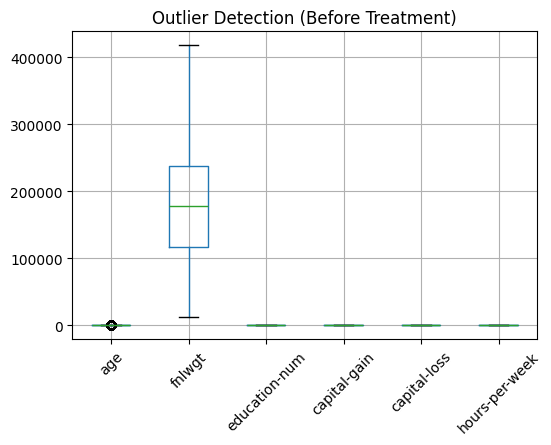

In [27]:
adult_data[num_cols].boxplot(rot=45, figsize=(6,4))
plt.title("Outlier Detection (Before Treatment)")
plt.show()


#Treat Outliers

In [30]:
for col in num_cols:
    Q1 = adult_data[col].quantile(0.25)
    Q3 = adult_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    adult_data[col] = adult_data[col].clip(lower, upper)




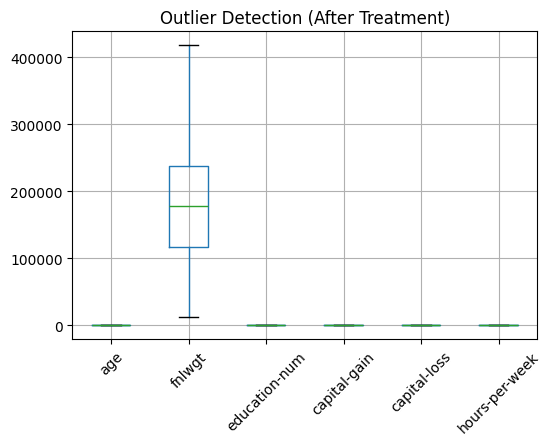

In [31]:
    adult_data[num_cols].boxplot(rot=45, figsize=(6,4))
plt.title("Outlier Detection (After Treatment)")
plt.show()

#Encode Categorical Variables

In [32]:
adult_data_encoded = pd.get_dummies(adult_data, drop_first=True)

#Feature Scaling

In [33]:
scaler = StandardScaler()
adult_data_encoded[num_cols] = scaler.fit_transform(adult_data_encoded[num_cols])
adult_data_encoded=adult_data_encoded.astype(int)

In [34]:
adult_data_encoded.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K.,income_>50K,income_>50K.
0,0,-1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,-1,1,0,0,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,-1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
adult_data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 100 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        48842 non-null  int64
 1   fnlwgt                                     48842 non-null  int64
 2   education-num                              48842 non-null  int64
 3   capital-gain                               48842 non-null  int64
 4   capital-loss                               48842 non-null  int64
 5   hours-per-week                             48842 non-null  int64
 6   workclass_Local-gov                        48842 non-null  int64
 7   workclass_Never-worked                     48842 non-null  int64
 8   workclass_Private                          48842 non-null  int64
 9   workclass_Self-emp-inc                     48842 non-null  int64
 10  workclass_Self-emp-not-inc                 48

#Prepare data for PCA

In [36]:
X = adult_data_encoded.values

#Apply PCA

In [37]:
pca = PCA()
X_pca = pca.fit_transform(X)

#Explained Variance Plot

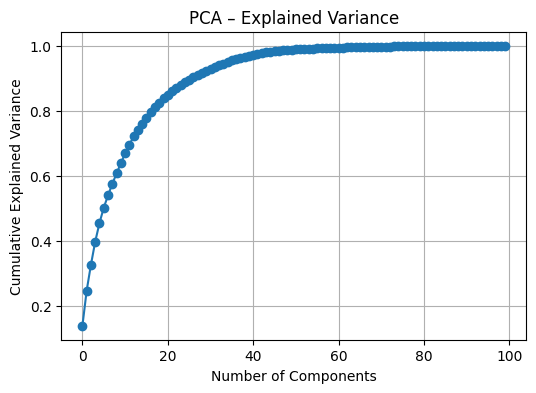

In [38]:
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

plt.figure(figsize=(6,4))
plt.plot(cum_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA – Explained Variance')
plt.grid()
plt.show()

#Apply PCA with 95% variance

In [39]:
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X)

In [40]:
X_pca_95.shape

(48842, 35)

#Convert PCA output to DataFrame

In [41]:
pca_cols = [f'PC{i+1}' for i in range(X_pca_95.shape[1])]

a_d_pca = pd.DataFrame(X_pca_95, columns=pca_cols)

#2 Exploratory Analysis

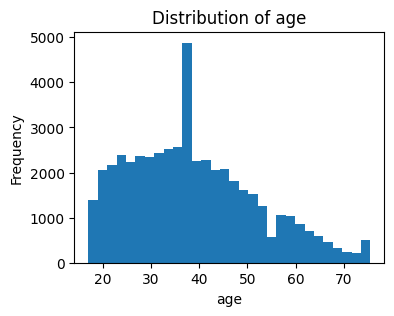

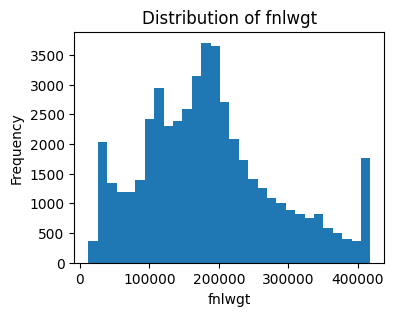

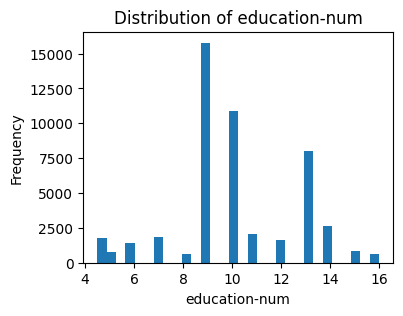

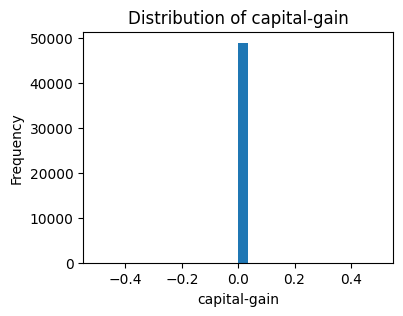

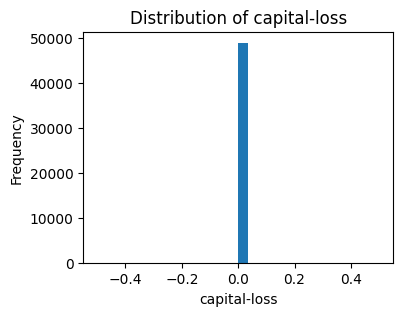

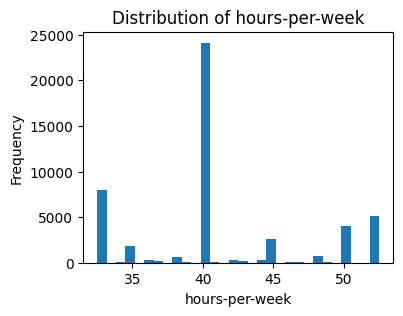

In [43]:
num_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

for col in num_cols:
    plt.figure(figsize=(4,3))
    plt.hist(adult_data[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


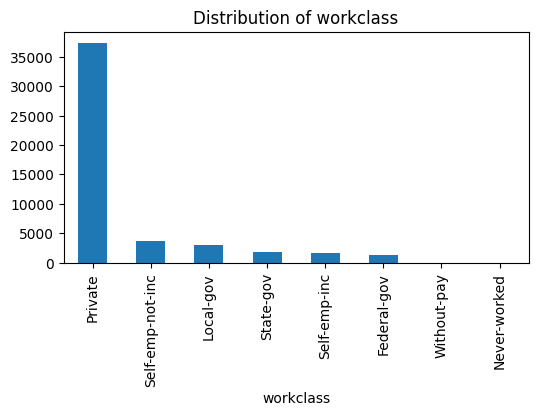

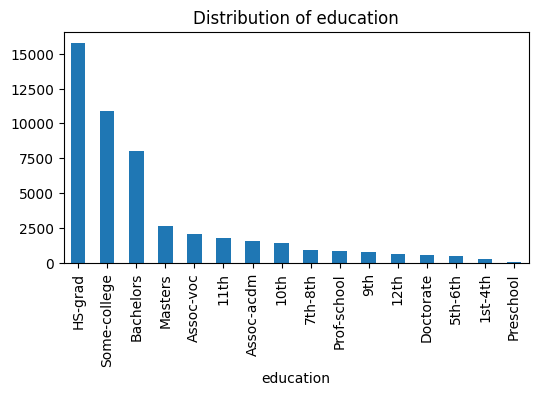

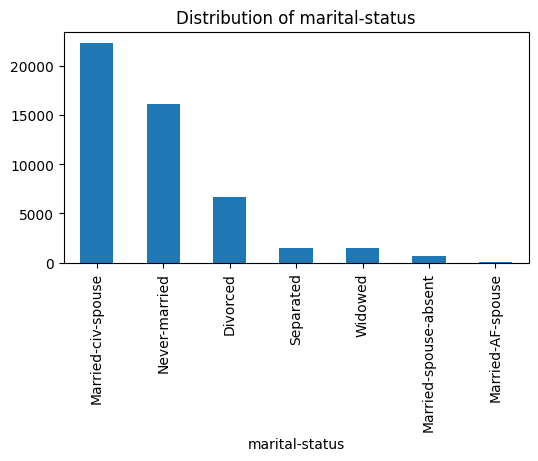

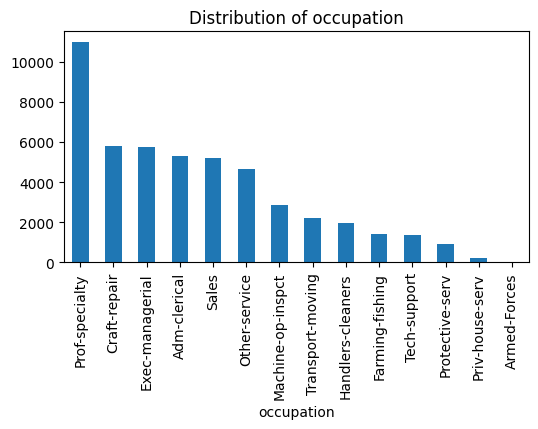

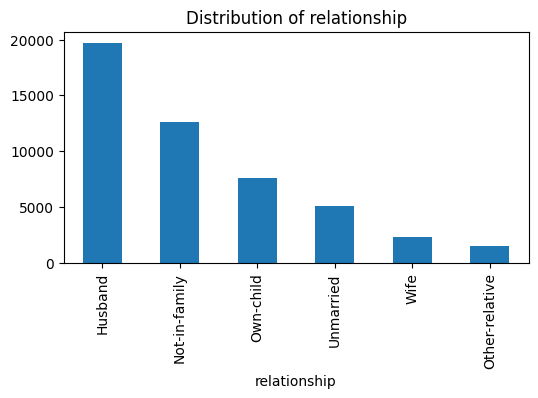

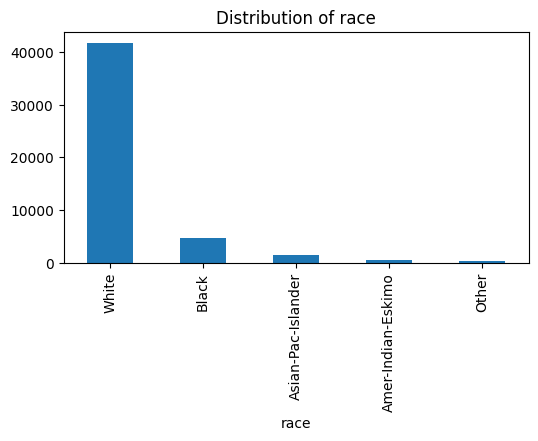

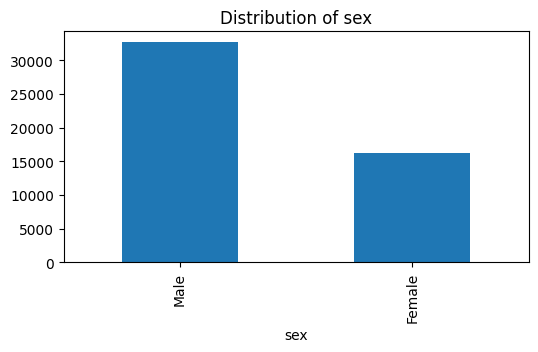

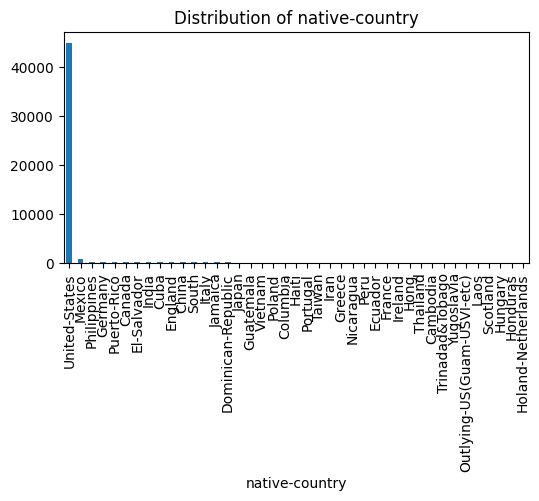

In [44]:
cat_cols = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

for col in cat_cols:
    plt.figure(figsize=(6,3))
    adult_data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

#Analyze Correlations Between Variables

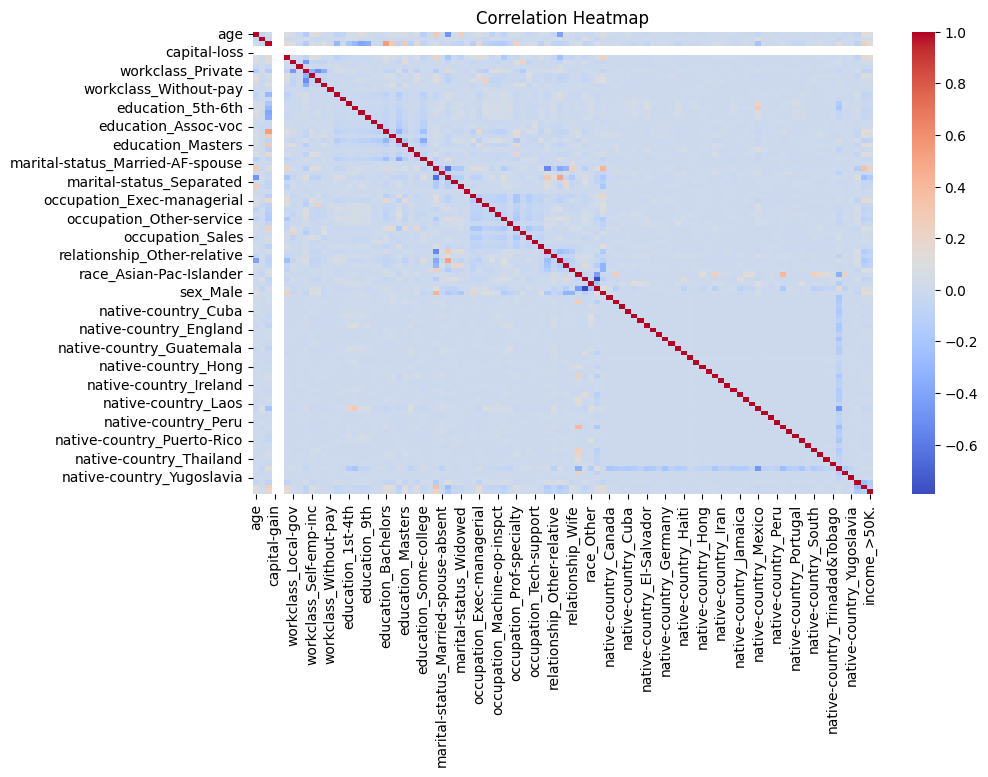

In [45]:
plt.figure(figsize=(10,6))
corr = adult_data_encoded.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [46]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(adult_data_encoded)


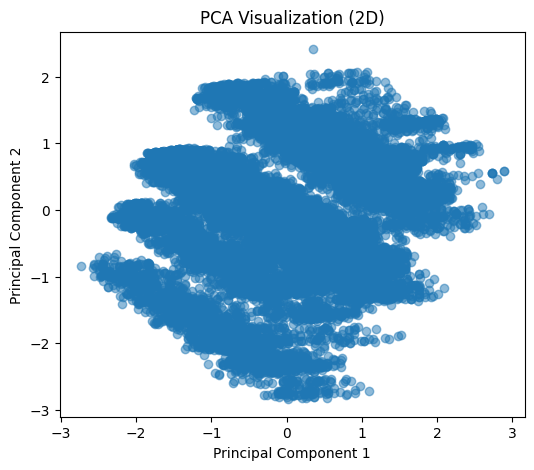

In [47]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (2D)')
plt.show()

#(Optional) t-SNE Visualization

In [49]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(adult_data_encoded.sample(3000))

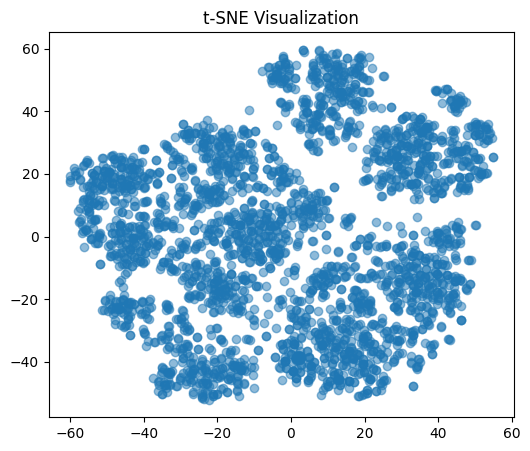

In [50]:
plt.figure(figsize=(6,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.5)
plt.title("t-SNE Visualization")
plt.show()


#3 Clustering

In [51]:
adult_data_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K.,income_>50K,income_>50K.
0,0,-1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,-1,1,0,0,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,-1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
48838,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
48839,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
48840,0,-1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [53]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(adult_data_encoded)

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_2)
    inertia.append(kmeans.inertia_)

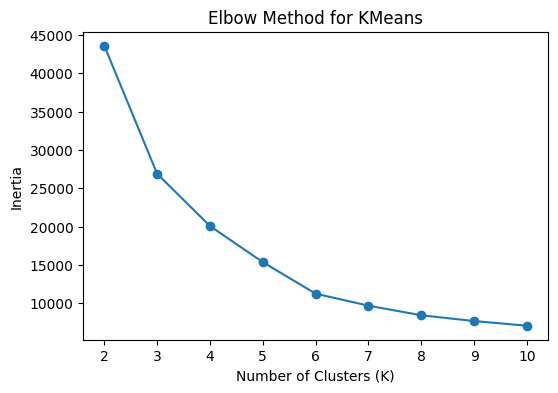

In [55]:
plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.show()

#Silhouette Score (confirm K)

In [56]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca_2)
    score = silhouette_score(X_pca_2, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")

K=2, Silhouette Score=0.382
K=3, Silhouette Score=0.446
K=4, Silhouette Score=0.467
K=5, Silhouette Score=0.485
K=6, Silhouette Score=0.482


In [57]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca_2)

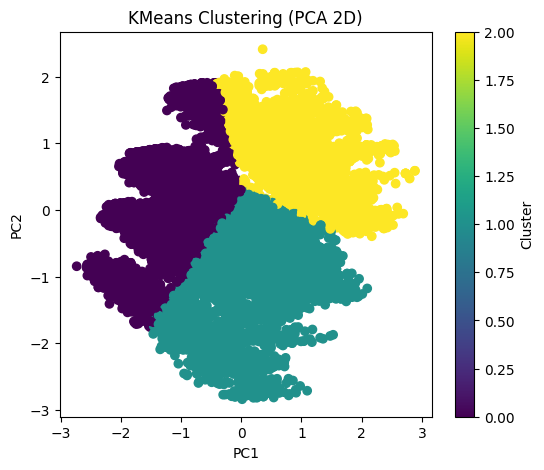

In [58]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=kmeans_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering (PCA 2D)')
plt.colorbar(label='Cluster')
plt.show()

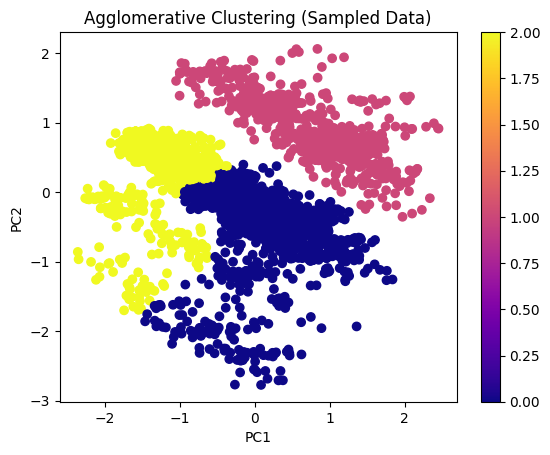

In [59]:
sample_size = 3000
idx = np.random.choice(len(X_pca_2), sample_size, replace=False)
X_sample = X_pca_2[idx]

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_sample)

plt.scatter(X_sample[:,0], X_sample[:,1], c=labels, cmap='plasma')
plt.title('Agglomerative Clustering (Sampled Data)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()


#dendrogram

In [60]:
sample_size = 1000
idx = np.random.choice(len(X_pca_2), sample_size, replace=False)
X_sample = X_pca_2[idx]

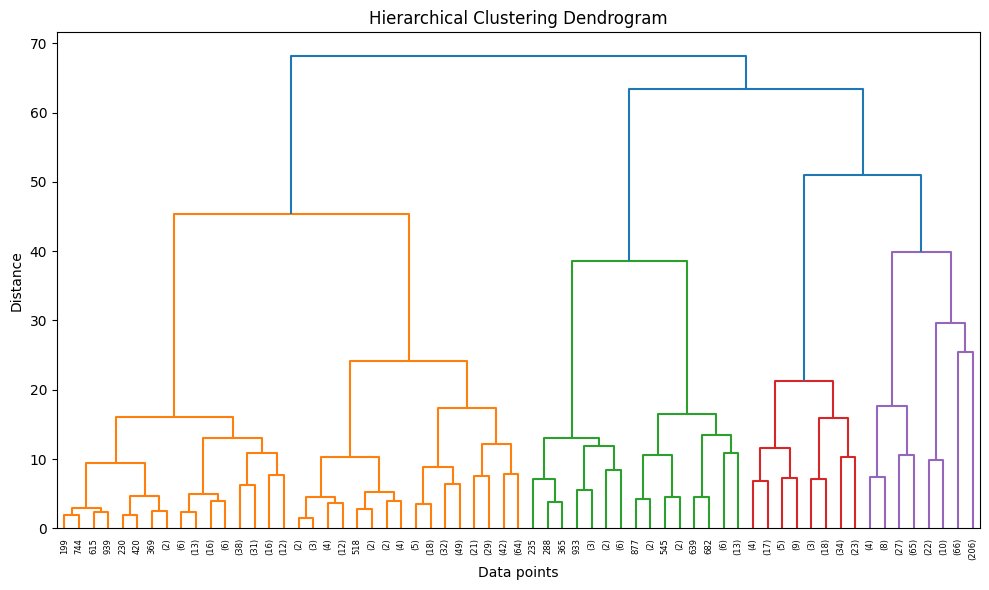

In [62]:
X_sample = X[np.random.choice(X.shape[0], 1000, replace=False)]

scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

pca = PCA(n_components=5, random_state=42)
X_reduced = pca.fit_transform(X_sample_scaled)

Z = linkage(X_reduced, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

#4 Interpretation & Profiling

In [63]:
adult_data_clustered = adult_data.copy()
adult_data_clustered['Cluster'] = kmeans_labels

In [64]:
adult_data_clustered['Cluster'].value_counts()

,count
Cluster,
1,21002
0,16776
2,11064


In [65]:
num_cols = ['age','education-num','hours-per-week','capital-gain','capital-loss']

cluster_profile_num = adult_data_clustered.groupby('Cluster')[num_cols].mean()
cluster_profile_num

,age,education-num,hours-per-week,capital-gain,capital-loss
Cluster,,,,,
0,28.572008,9.407576,38.243503,0.0,0.0
1,44.705528,8.898605,42.179626,0.0,0.0
2,41.912554,13.527928,43.512880,0.0,0.0


In [66]:
cat_cols = ['workclass','education','marital-status','occupation','sex']

for col in cat_cols:
    print("\n", col.upper())
    print(adult_data_clustered.groupby('Cluster')[col].agg(lambda x: x.value_counts().index[0]))



 WORKCLASS
Cluster
0    Private
1    Private
2    Private
Name: workclass, dtype: object

 EDUCATION
Cluster
0      HS-grad
1      HS-grad
2    Bachelors
Name: education, dtype: object

 MARITAL-STATUS
Cluster
0         Never-married
1    Married-civ-spouse
2    Married-civ-spouse
Name: marital-status, dtype: object

 OCCUPATION
Cluster
0    Prof-specialty
1      Craft-repair
2    Prof-specialty
Name: occupation, dtype: object

 SEX
Cluster
0    Female
1      Male
2      Male
Name: sex, dtype: object


In [67]:
pd.crosstab(adult_data_clustered['Cluster'], adult_data_clustered['income'], normalize='index')

income,<=50K,<=50K.,>50K,>50K.
Cluster,,,,
0,0.641452,0.344659,0.008703,0.005186
1,0.496143,0.235787,0.179792,0.088277
2,0.319866,0.153742,0.354212,0.172180


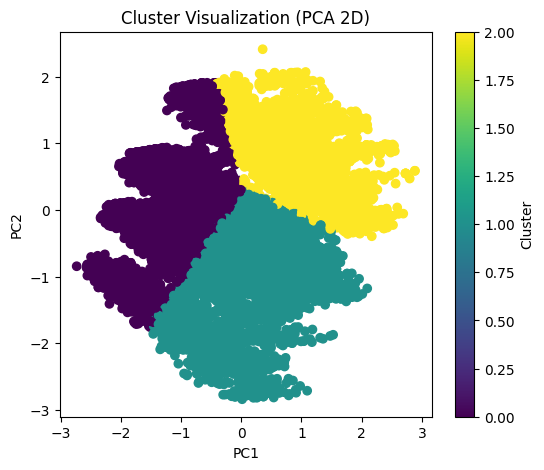

In [68]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=kmeans_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Visualization (PCA 2D)')
plt.colorbar(label='Cluster')
plt.show()